In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [39]:
titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
# 1. Survived 열 요약
# - 생존자/사망자 전체 비율
# - 성별에 따른 생존자/사망자

<AxesSubplot:xlabel='survived', ylabel='sex'>

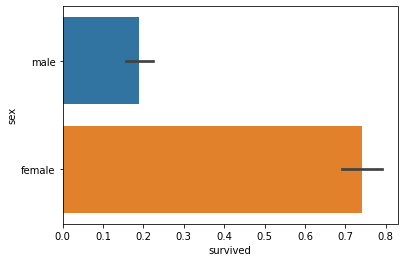

In [8]:
sns.barplot(x='survived', y='sex',data=titanic)

<AxesSubplot:xlabel='sex'>

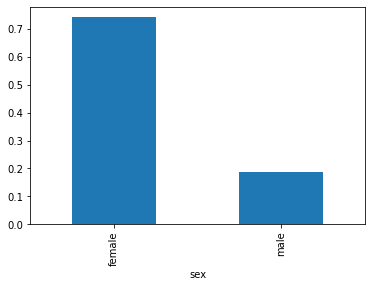

In [10]:
titanic.groupby('sex').survived.mean().plot(kind='bar')

In [ ]:
# 2. Pclass 열 요약
# - 등실 비율
# - 등실에 따른 생존자/사망자 비율

([<matplotlib.axis.XTick at 0x1a77ecc2190>,
 [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')])

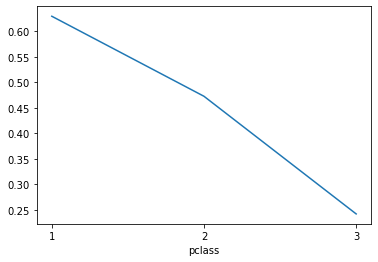

In [17]:
titanic.groupby('pclass').survived.mean().plot()
plt.xticks([1,2,3])

<AxesSubplot:xlabel='pclass', ylabel='survived'>

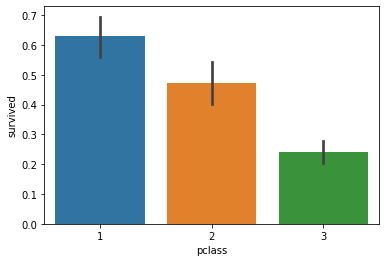

In [20]:
sns.barplot(x='pclass', y='survived', data=titanic)

In [ ]:
# 3. Age 열
# - 나이대를 구분한 후, 각 나이대별 생존율
# - 결측값을 제외한 나머지 데이터에 대해 이상치 검출

In [41]:
titanic.age = titanic.age.fillna(titanic.age.median())

In [42]:
bin = [0, 18, 25, 35, 60 ,100]
label = ['baby', 'Youth', 'YouthAdult', 'Adult', 'Senior']
titanic['AgeGroup'] = pd.cut(titanic['age'], bins=bin, labels=label)
titanic['AgeGroup'].value_counts()

YouthAdult    373
Adult         195
Youth         162
baby          139
Senior         22
Name: AgeGroup, dtype: int64

In [43]:
titanic.AgeGroup.isna().sum()

0

<AxesSubplot:xlabel='AgeGroup', ylabel='survived'>

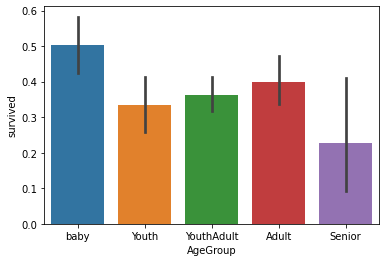

In [44]:
sns.barplot(x='AgeGroup', y='survived', data=titanic)

In [ ]:
# 4. Fare 열
# - 운임을 전체 5개 구간으로 분리한 후,
# 각 구간별 생존율

In [28]:
titanic['fareGroup'] = pd.qcut(titanic.fare, 5, labels=['lowest', 'lower', 'middle', 'higher', 'highest'])
titanic['fareGroup']

0       lowest
1      highest
2        lower
3      highest
4        lower
        ...   
886     middle
887     higher
888     higher
889     higher
890     lowest
Name: fareGroup, Length: 891, dtype: category
Categories (5, object): ['lowest' < 'lower' < 'middle' < 'higher' < 'highest']

<AxesSubplot:xlabel='fareGroup', ylabel='survived'>

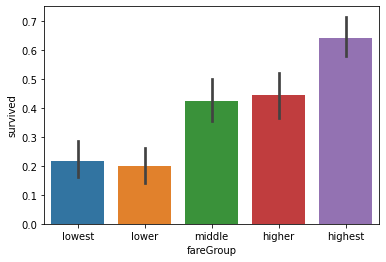

In [29]:
sns.barplot(x=titanic['fareGroup'], y='survived', data=titanic)

In [ ]:
# 5. Name 열 
# - 호칭을 제외한 이름에서 자음과 모음의 비율
# - 성별에 따른 자음과 모음의 비율

In [45]:
titanic=pd.read_csv('../kaggle/titanic/train.csv')
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [55]:
titanic['names']= titanic.Name.str.extract('([A-Za-z]+),', expand=False).str.lower()
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,names
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,braund
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,cumings
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,heikkinen
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,futrelle
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,allen
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,montvila
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,graham
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,johnston
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,behr


In [89]:
moeum=['a', 'e', 'i', 'o', 'u']
moeumList=[]
moeumNotList=[]
moeumPercentList=[]

for j in range(len(titanic['names'])):
    moeum_number=0
    moeum_not_number=0

    for i in list(titanic['names'][j]):
        if i in moeum:
            moeum_number+=1
        else:
            moeum_not_number+=1

    moeumList.append(moeum_number)
    moeumNotList.append(moeum_not_number)
    moeumPercentList.append(moeum_number / (moeum_number + moeum_not_number))


In [96]:
titanic['Moeum'] = moeumList
titanic['NotMoeum'] = moeumNotList
titanic['MoeumPercent'] = moeumPercentList
titanic['JaeumPercent'] = 1- np.array(moeumPercentList)

In [97]:
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,names,Moeum,NotMoeum,MoeumPercent,JaeumPercent
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,braund,2,4,0.333333,0.666667
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,cumings,2,5,0.285714,0.714286
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,heikkinen,4,5,0.444444,0.555556
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,futrelle,3,5,0.375000,0.625000
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,allen,2,3,0.400000,0.600000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,montvila,3,5,0.375000,0.625000
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,graham,2,4,0.333333,0.666667
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,johnston,2,6,0.250000,0.750000
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,behr,1,3,0.250000,0.750000


<AxesSubplot:xlabel='Sex', ylabel='MoeumPercent'>

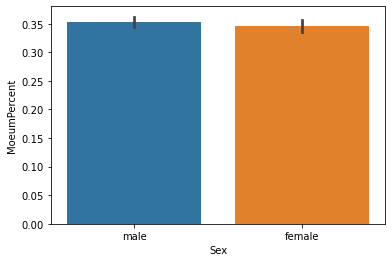

In [94]:
sns.barplot(x='Sex', y='MoeumPercent', data=titanic)

<AxesSubplot:xlabel='Sex', ylabel='JaeumPercent'>

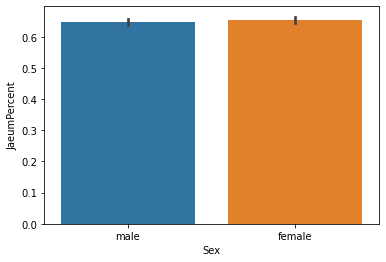

In [98]:
sns.barplot(x='Sex', y='JaeumPercent', data=titanic)